<img style="float: left; padding-right: 0px; width: 145px" src="https://upload.wikimedia.org/wikipedia/fr/thumb/e/e9/EPF_logo_2021.png/524px-EPF_logo_2021.png"> 
<br><br>


###  <div style="text-align: right">  Data Engineering - P2024 <br> <br>  <time datetime="2023-03-07">2023/04/04</time> <br> <br> <u>Name </u>: RAPADAMNABA Robert </div>
<br> 



#   <center>  Algebra and Analysis for Machine Learning </center>

#  <center><u>  Laboratory 1 - Linear Algebra and Distances</u></center>

In this Lab,  we will try to solve the matrix linear equations found in the modeling part of the linear algebra worksheet (the first mini-group work). We will write, on the one hand, scripts using the equality $A^TAc=A^Ty$ seen in class and on the other hand, built-in functions available on ScikitLearn. This will show/confirm you what are the maths behind these built-in functions. Then, we will implement/use or apply most of distances seen during lectures and mini-group works to small exercises.

After completing this lab, you will be able to know:

    - How to perform least squares approximations in python (with and without ScikitLearn built-in functions)

    - How to check the maths behind ScikitLearn built-in functions

    - How to implement, use or apply most of distances used in ML.


Let’s get started.

# I. Linear regression using least squares

## 1. Exercise 1: Average Daily high temperature in Montreal in March (Exercise 1 from part Modeling of Linear algebra exercise sheet)

In this exercise, we are going to solve the first exercise (Part modeling of the exercise sheet on linear algebra) using Python. 
For this,

- Write a script using the formula seen in class ($A^TAc=A^Ty$) to compute the coefficient $c$ of the linear model assumed. 
- Using `matplotlib`,  scatter plot Temperature data (as observed temperature) and plot the predicted model, the  linear model $p(x) = c_1x + c_2$ for temperature in Montreal (predicted temperature) in a same figure. 
- Find also the predicted model for temperature using built-in functions from ScikitLearn. More specifically, import  `LinearRegression()` from `sklearn.linear_model`; then create, your model (call it $model$) using the `fit()` attribute of `LinearRegression()`. Have a look at attributes `coef_` and `intercept_` which give you c1 (the slope) and the constant c2 of the predicted model $ c_1x + c_2$. 
- Print the coefficient $c$ found for the predicted model. What do you notice? (Is this different from the c found using the formula seen in class?)
- Gather on the same figure, a scatter plot of observed data, a plot of the predicted model using the formula seen in class, and a plot of the predicted model got using ScikitLearn





The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:
c1 = 0.28849193548387086 
c2 = -2.469419354838708


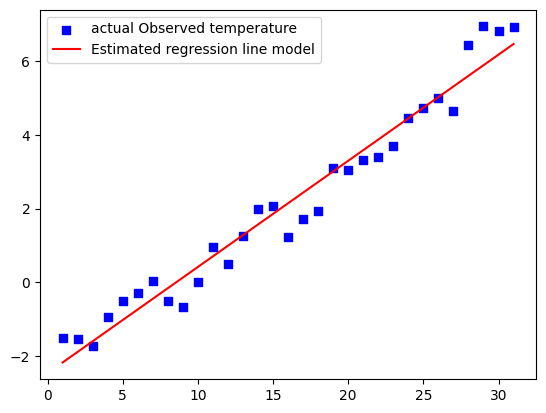

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dfA = pd.read_csv('tempday.csv')
x = dfA['Day'].values.reshape(-1,1)
y = dfA['Temp'].values.reshape(-1,1)
matA = np.hstack((x,np.ones_like(x)))
matATA = matA.T.dot(matA)
matATA = matA.T.dot(matA)
matATy = matA.T.dot(y)
c = np.linalg.solve(matATA,matATy)
y_model = matA.dot(c)
model = LinearRegression().fit(x,y)
c1 = model.coef_[0][0]
c2 = model.intercept_[0]
y_sklearn = model.predict(x)
print('The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:\nc1 =', c[0][0],'\nc2 =',c[1][0])
plt.scatter(x,y,color='blue',label='actual Observed temperature', marker='s')
plt.plot(x, y_model, color='red', label='Estimated regression line model')
plt.legend()
plt.show()



The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:
c1 = 0.28849193548387086 
c2 = -2.469419354838708


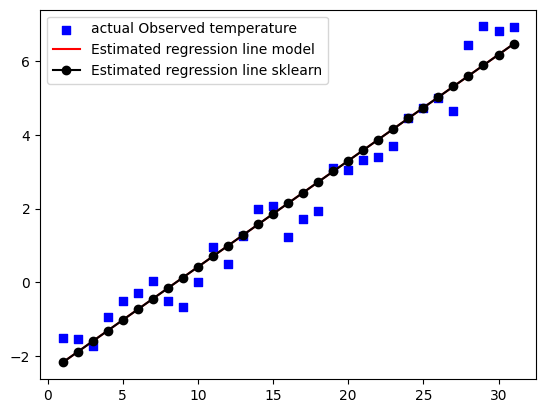

In [22]:
from sklearn.linear_model import LinearRegression
dfA = pd.read_csv('tempday.csv')
x = dfA['Day'].values.reshape(-1,1)
y = dfA['Temp'].values.reshape(-1,1)
matA = np.hstack((x,np.ones_like(x)))
matATA = matA.T.dot(matA)
matATA = matA.T.dot(matA)
matATy = matA.T.dot(y)
c = np.linalg.solve(matATA,matATy)
y_model = matA.dot(c)
model = LinearRegression().fit(x,y)
c1 = model.coef_[0][0]
c2 = model.intercept_[0]
y_sklearn = model.predict(x)
print('The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:\nc1 =', c[0][0],'\nc2 =',c[1][0])
plt.scatter(x,y,color='blue',label='actual Observed temperature', marker='s')
plt.plot(x, y_model, color='red', label='Estimated regression line model')
plt.plot(x, y_sklearn, color='black', label='Estimated regression line sklearn',marker='o')
plt.legend()
plt.show()

## 2. Exercise 2: Average daily high temperature in Montreal (by month)(Exercise 5 from part Modeling of Linear algebra exercise sheet) 

As in exercise 1,

- Write a script using the formula seen in class ($A^TAc=A^Ty$) to compute the coefficient $c$ of the model assumed. 
- Using `matplotlib`,  scatter plot Temperature data (as observed temperature) and plot the predicted model, the  model $$p(x) = c_1 + c_2 \sin\left(\frac{\pi}{6}x\right) + c_3 \cos\left(\frac{\pi}{6}x\right)$$ for temperature in Montreal (predicted temperature) in a same figure. 
- Find also the predicted model for temperature using built-in functions from ScikitLearn. More specifically, import  `LinearRegression()` from `sklearn.linear_model`; then create, your model (call it $model$) using the `fit()` attribute of `LinearRegression()`. Have a look at attributes `coef_` and `intercept_` which give you the coefficients c1,  c2 and c3 of the predicted model. 
- Print $c$ found for the predicted model. What do you notice? (Is this different from the c found using the formula seen in class?)
- Gather on the same figure, a scatter plot of observed data, a plot of the predicted model using the formula seen in class, and a plot of the predicted model got using ScikitLearn. Is the graph of predicted model derivable?
- Same question but this time, add another plot smoothing the predicted model  using `interpolate.InterpolatedUnivariateSpline()`.

The coefficient c of the  model using the least squares technique seen in class is:
c1 = -1.0773502691896206 
c2 = -15.460895300726618 
c3 = 11.416666666666664

*********************************************************
Plotting without spline


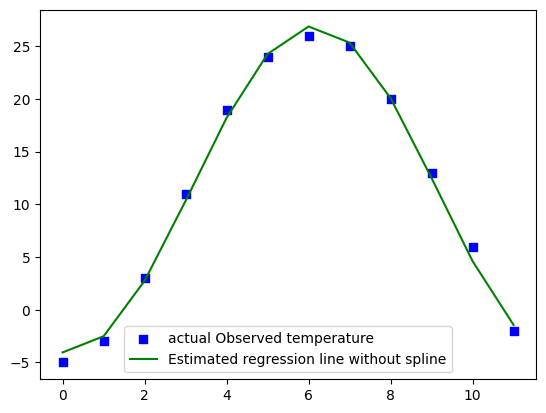

*************************************************************
Plotting  with spline


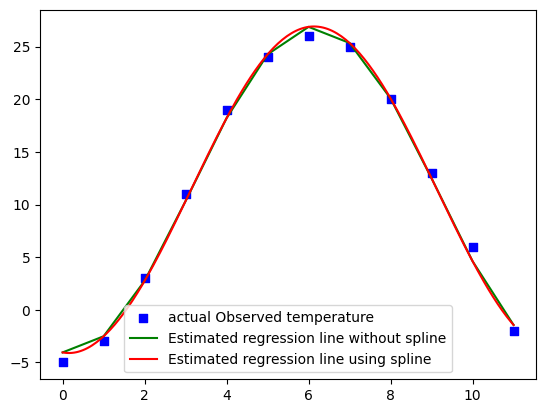

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

dfA = pd.read_csv('tempmonth.csv')
x = dfA.index.values.reshape(-1,1)
y = dfA['average_temperature'].values.reshape(-1,1)
matA = np.hstack((np.sin(np.pi/6*x), np.cos(np.pi/6*x), np.ones_like(x)))
matATA = matA.T.dot(matA)
matATy = matA.T.dot(y)
c = np.linalg.solve(matATA, matATy)
y_model = matA.dot(c)
print('The coefficient c of the  model using the least squares technique seen in class is:')
print('c1 =', c[0][0], '\nc2 =', c[1][0], '\nc3 =', c[2][0])
print('\n*********************************************************\nPlotting without spline')
plt.scatter(x,y,color='blue',label='actual Observed temperature',marker='s')
plt.plot(x, y_model, color='green', label='Estimated regression line without spline')
plt.legend()
plt.show()
print('*************************************************************\nPlotting  with spline')
spl = InterpolatedUnivariateSpline(x.flatten(), y_model.flatten())
x_smooth = np.linspace(0, 11, 200).reshape(-1, 1)
y_smooth = spl(x_smooth)
plt.scatter(x,y,color='blue',label='actual Observed temperature',marker='s')
plt.plot(x, y_model, color='green', label='Estimated regression line without spline')
plt.plot(x_smooth, y_smooth, color='red', label='Estimated regression line using spline')
plt.legend()
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(matA[:,:2], y)
c1 = model.coef_[0][0]
c2 = model.coef_[0][1]
c3 = model.intercept_[0]
y_sklearn = model.predict(matA[:,:2])

print(f'The coefficient c of the  model using ScikitLearn is:\nc1={c1}\nc2={c2}\nc3={c3}')

The coefficient c of the  model using ScikitLearn is:
c1=-1.0773502691896202
c2=-15.460895300726623
c3=11.416666666666664


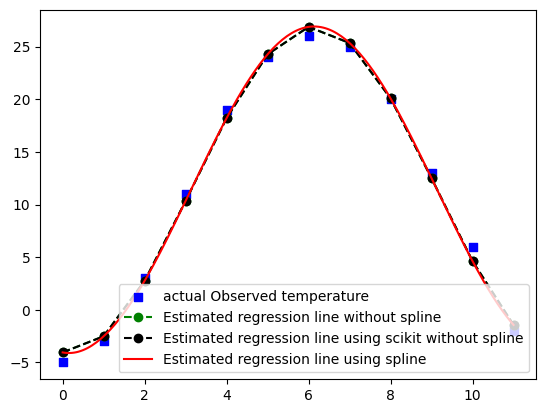

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x,y,color='blue',label='actual Observed temperature',marker='s')
plt.plot(x, y_model, color='green', label='Estimated regression line without spline',linestyle='--',marker='o')
plt.plot(x, y_sklearn, color='black', label='Estimated regression line using scikit without spline',marker='o',linestyle='--')
plt.plot(x_smooth, y_smooth, color='red', label='Estimated regression line using spline')
plt.legend()

plt.show()


## 3. Exercise 3:  Best-fit Line and Best-fit Parabola  (Exercise 4 from part Modeling of Linear algebra exercise sheet)

 Perform line fit and Parabola fit using using the following steps as in the exercise 1

- Write a script using the formula seen in class ($A^TAc=A^Ty$) to compute the coefficient $c$ of the models assumed. 
- Using `matplotlib`,  scatter plot observed points (as observed data) and plot the predicted model, one the one hand, for the  linear model $p(x) = c_1x + c_2$ and on the other hand, for the parabola model $p(x) = c_1 + c_2x + c_3x^2,$ (each plot in a same figure.) 
- Find also the predicted models for these points using built-in functions from ScikitLearn. More specifically, import  `LinearRegression()` from `sklearn.linear_model`; then create, your model (call it $model$) using the `fit()` attribute of `LinearRegression()`. Have a look at attributes `coef_` and `intercept_` which give you c1 (the slope) and the constant c2 of the predicted model $ c_1x + c_2$ and c1, c2, and c3 for the predictid model $c_1 + c_2x + c_3x^2$.
- Print the coefficient $c$ found for the predicted models. What do you notice? (Is this different from the c found using the formula seen in class?)
- Gather on the same figure, a scatter plot of observed data, a plot of the predicted models using the formula seen in class, and a plot of the predicted models got using ScikitLearn

- For parabola fit, is the graph of predicted model derivable?
- To the previous plot for Parabola fit, add another plot smoothing the predicted model  using `interpolate.InterpolatedUnivariateSpline()`


### <u> <center> Best-fit Line </center></u>

The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:
c1=0.37142857142857116
c2=1.5999999999999996

******************************************************************************************************************
Scatter plot of observed data together with a plot of the predicted model using the formula seen in class:


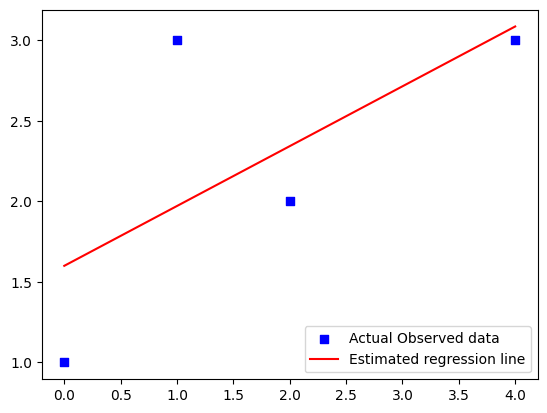

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
points = [(0,1),(1,3),(2,2),(4,3)]
x = np.array([pt[0] for pt in points]).reshape(-1, 1)
y = np.array([pt[1] for pt in points]).reshape(-1, 1)
A = np.hstack((x, np.ones_like(x)))
c = np.linalg.inv(A.T @ A) @ A.T @ y
print(f"The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:\nc1={c[0][0]}\nc2={c[1][0]}")
print('\n******************************************************************************************************************\nScatter plot of observed data together with a plot of the predicted model using the formula seen in class:')
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', marker='s', label='Actual Observed data')
y_model = c[0] * x + c[1]
ax.plot(x, y_model, color='red', linestyle='-', label='Estimated regression line')
plt.legend()
plt.show()


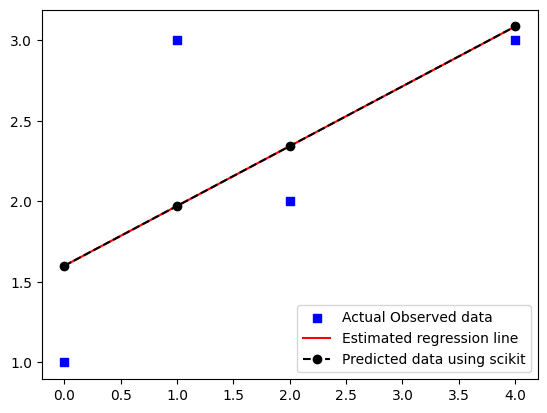

In [65]:
from sklearn.linear_model import LinearRegression
#model creation
reg = LinearRegression().fit(np.array(x).reshape(-1, 1), y)
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', marker='s', label='Actual Observed data')
ax.plot(x, y_lin, color='red', linestyle='-', label='Estimated regression line')
ax.plot(x, reg.predict(np.array(x).reshape(-1, 1)), color='black', linestyle='--', label='Predicted data using scikit',marker='o')
plt.legend()
plt.show()


### <u> <center>  Best-fit Parabola</center></u>

The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:
c1=[0.60227273]
c2=[-0.86136364]
c3=[-0.93181818]

*********************************************************
Plotting without spline



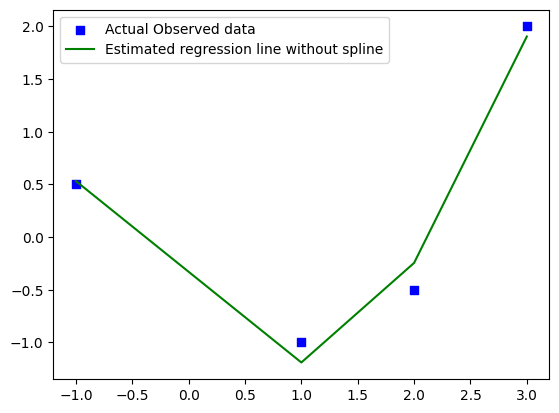


*************************************************************
Plotting  with spline



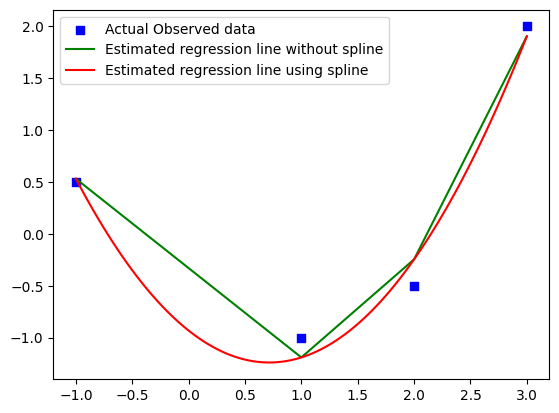

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Dataframe of points
points = [(-1,1/2),(1,-1),(2,-1/2),(3,2)]
x = np.array([pt[0] for pt in points]).reshape(-1, 1)
y = np.array([pt[1] for pt in points]).reshape(-1, 1)
A = np.hstack((x**2, x, np.ones_like(x)))
c = np.linalg.inv(A.T @ A) @ A.T @ y
x_model = np.linspace(x.min(), x.max(), 100)
y_model = c[0]*x**2 + c[1]*x + c[2]
print(f"The coefficient c of the linear model c1x+c2 using the least squares technique seen in class is:\nc1={c[0]}\nc2={c[1]}\nc3={c[2]}")
print('\n*********************************************************\nPlotting without spline\n')
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', marker='s', label='Actual Observed data')
ax.plot(x, y_model, color='green', linestyle='-', label='Estimated regression line without spline')
plt.legend()
plt.show()
print('\n*************************************************************\nPlotting  with spline\n')
fig, ax = plt.subplots()
poly_fit = np.poly1d(c.ravel())
y_smooth = poly_fit(x_model)
ax.scatter(x, y, color='blue', marker='s', label='Actual Observed data')
ax.plot(x, y_model, color='green', linestyle='-', label='Estimated regression line without spline')
plt.plot(x_model, y_smooth, color='red', label='Estimated regression line using spline')
plt.legend()
plt.show()


In [124]:
# Import packages and classes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
points = [(-1,1/2),(1,-1),(2,-1/2),(3,2)]
x = np.array([pt[0] for pt in points]).reshape(-1, 1)
y = np.array([pt[1] for pt in points])

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
c = [lin_reg.coef_,lin_reg.intercept_]
print(f"The coefficient c of the parabolic model using ScikitLearn is:\nc1={c[0][2]}\nc2={c[0][1]}\nc3={c[1]}")
y_sklearn = lin_reg.predict(poly.fit_transform(x))
r2 = r2_score(y, y_sklearn)
print(f"coefficient of determination: {r2*100}%")


The coefficient c of the parabolic model using ScikitLearn is:
c1=0.6022727272727275
c2=-0.8613636363636367
c3=-0.9318181818181825
coefficient of determination: 97.87878787878788%


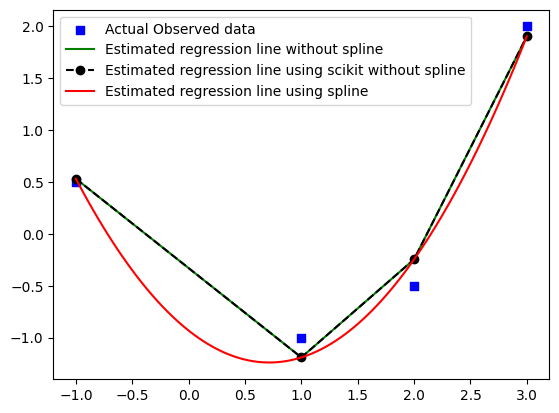

In [125]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x, y, color='blue', marker='s', label='Actual Observed data')
ax.plot(x, y_model, color='green', linestyle='-', label='Estimated regression line without spline')
ax.plot(x,y_sklearn,marker='o',label='Estimated regression line using scikit without spline',linestyle='--',color='black')
plt.plot(x_model, y_smooth, color='red', label='Estimated regression line using spline')
plt.legend()
plt.show()

# II. Distances

## Exercise 1 : Implement the Hamming 

As a reminder, the Hamming Distance measures the similarity between 2 strings of the same length. The Hamming Distance between 2 strings of the same length is the number of positions at which
the corresponding characters are different. This distance can be also expressed as the proportion of disagreeing characters between 2 strings (position of characters is important).

- Write a function called *dist_hamming(string1, String2)* which returns the hamming distance as tuple consisting of (the number of positions at which the characters are different, the proportion of disagreeing characters between both strings) if strings have the same length. If not,  Your function must return this message: "Cannot compute the hamming distance: length of strings are different"
- Import `distance` from `scipy.spatial` and use the attribute `hamming` of the imported distance to compurte the proportion of disagreeing characters between both strings.
- Test your functions on the couples of strings below: 

        - ALEXANDRE and ALEKSANDR

		- CLOSE and CLOUE

		- LIONGMOT and LONGMOIT 

		- LONGIMOT and LONGMOIT 

		- WIKIMEDIA and WIKIMANIA	

		- ALEXANDRE and ALEKSANDER
		
		- WIKIMEDIA and REMEDY
	

## Exercise 2: The Edit distance

As a reminder, the edit distance between two strings refers to the minimum number of character insertions, deletions, and substitutions required to change one string to the other. 
- Write a Python program to compute the edit distance between two given string
- Install edit distance (use pip install editdistance or pip install levenshtein )
- If you have chosen to install it using pip install editdistance, then import `editdistance` and use the attribute `eval` of the imported distance to compute the edit distance between 2 strings. However, your choice is to install it using pip install levenshtein, then import `distance` from `Levenshtein` and use the imported distance directly to compute the edit distance between 2 strings. 

- Test your functions on the couples of strings below: 

        - ALEXANDRE and ALEKSANDR

		- CLOSE and CLOUE

		- LIONGMOT and LONGMOIT 

		- LONGIMOT and LONGMOIT 

		- LONGMOT and LONGMOIT

		- WIKIMEDIA and WIKIMANIA	

		- ALEXANDRE and ALEKSANDER
		
		- WIKIMEDIA and REMEDY

## Exercice 3 : Jaccard Similarity
As a reminder, Jaccard Similarity is defined as an intersection of two documents divided by the union of that two documents that refer to the number of common words over a total number of words. 
The mathematical representation of the Jaccard Similarity is:
$$Jaccard(doc_1,doc_2)= \frac{doc_1 \cap doc_2}{doc_1 \cup doc_2}$$

- Write a python program computing the Jaccard similarity 

- Test your code with the sentences :

    - Document_1="Data is the new oil of the digital economy"

    - Document_2="Data is a new oil"

## Exercice 4: Implement the Cosine Similarity


- Write a python program computing the Cosine similarity 
- Test your code with these 3 documents considered 2 by 2

    - Document 1 = ‘data science is one of themost important fields of science’

    - Document 2 = ‘this is one of the best data science courses’
    
    - Document 3 = ‘data scientists analyze data’

# Conclusion: